In [0]:
! shred -u setup_google_colab.py
! wget https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/setup_google_colab.py -O setup_google_colab.py
import setup_google_colab
# please, uncomment the week you're working on
# setup_google_colab.setup_week1()
# setup_google_colab.setup_week2()
# setup_google_colab.setup_week2_honor()
# setup_google_colab.setup_week3()
# setup_google_colab.setup_week4()
setup_google_colab.setup_week5()
# setup_google_colab.setup_week6()

--2020-05-24 10:11:52--  https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/setup_google_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3636 (3.6K) [text/plain]
Saving to: ‘setup_google_colab.py’

setup_google_colab. 100%[===================>]   3.55K  --.-KB/s    in 0s      

2020-05-24 10:11:52 (43.3 MB/s) - ‘setup_google_colab.py’ saved [3636/3636]



In [0]:
# set tf 1.x for colab
%tensorflow_version 1.x

# Generating names with recurrent neural networks

This time you'll find yourself delving into the heart (and other intestines) of recurrent neural networks on a class of toy problems.

Struggle to find a name for the variable? Let's see how you'll come up with a name for your son/daughter. Surely no human has expertize over what is a good child name, so let us train RNN instead;

It's dangerous to go alone, take these:

In [0]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
sys.path.append("..")
import keras_utils
import tqdm_utils

1.15.2


# Load data
The dataset contains ~8k earthling names from different cultures, all in latin transcript.

This notebook has been designed so as to allow you to quickly swap names for something similar: deep learning article titles, IKEA furniture, pokemon names, etc.

In [0]:
start_token = " "  # so that the network knows that we're generating a first token

# this is the token for padding,
# we will add fake pad token at the end of names 
# to make them of equal size for further batching
pad_token = "#"

with open("names") as f:
    names = f.read()[:-1].split('\n')
    names = [start_token + name for name in names]

In [0]:
print('number of samples:', len(names))
for x in names[::1000]:
    print(x)

number of samples: 7944
 Abagael
 Claresta
 Glory
 Liliane
 Prissie
 Geeta
 Giovanne
 Piggy


In [0]:
# a = map(len, names)

In [0]:
# for i in a:
#   print(i, end=" ")

8 8 5 6 5 6 5 8 8 8 5 7 4 5 8 6 6 6 5 6 9 6 8 8 8 8 7 7 6 5 4 7 6 6 6 7 7 6 6 9 7 8 8 9 9 7 8 9 7 8 8 3 6 6 7 7 5 6 5 5 8 6 7 8 7 7 8 5 6 8 5 5 6 7 7 6 5 7 6 5 6 6 5 8 8 8 8 5 7 8 6 7 6 7 7 8 10 10 7 7 6 7 8 6 10 12 6 6 11 6 8 5 6 10 12 6 7 8 8 7 6 8 4 5 6 6 7 7 6 7 6 6 5 6 7 7 7 7 5 6 5 7 8 7 5 10 6 7 6 8 8 7 5 7 6 6 8 5 7 8 7 7 7 7 8 8 5 5 7 7 7 8 7 6 6 5 6 6 7 7 6 7 7 9 7 7 8 7 7 8 7 7 7 8 7 6 7 6 6 8 9 6 4 7 7 8 8 8 4 5 6 10 4 4 7 9 9 6 9 8 9 9 10 10 11 8 6 5 6 6 7 9 7 7 7 9 10 11 10 5 11 5 6 7 7 5 6 7 7 8 9 9 9 9 10 9 8 6 6 5 5 6 7 6 7 5 10 7 4 9 10 5 11 11 11 8 8 9 9 10 10 10 10 8 9 10 9 9 9 9 10 10 5 13 9 11 12 10 9 10 8 8 5 7 6 8 9 9 8 7 5 8 7 8 6 7 7 11 10 10 8 8 11 9 5 10 10 6 10 4 7 8 8 9 9 5 7 7 8 8 8 8 6 7 8 7 6 7 6 7 6 7 7 8 7 8 9 6 7 8 8 7 6 7 6 7 7 7 8 8 6 8 7 8 7 5 6 7 5 7 7 9 7 7 6 7 6 5 6 7 7 9 7 7 8 8 8 7 7 9 7 7 6 5 6 6 6 7 7 6 7 5 8 8 10 10 5 6 6 8 8 8 6 6 8 7 8 7 7 7 8 8 4 8 7 7 5 5 6 7 6 6 4 4 7 8 7 5 6 7 6 5 9 8 13 12 6 7 9 7 6 7 7 6 5 7 6 6 10 9 4 9 9 8 8 5 5 

max length: 16


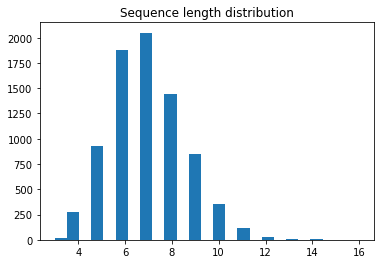

In [0]:
MAX_LENGTH = max(map(len, names))
print("max length:", MAX_LENGTH)

plt.title('Sequence length distribution')
plt.hist(list(map(len, names)), bins=25);

# Text processing

First we need to collect a "vocabulary" of all unique tokens i.e. unique characters. We can then encode inputs as a sequence of character ids.

In [0]:
char_set = {'#'}

In [0]:
for name in names:
  for char in name:
    char_set.add(char)

In [0]:
char_set = list(char_set)

In [0]:
tokens = char_set ### YOUR CODE HERE: all unique characters go here, padding included!

tokens = list(tokens)
n_tokens = len(tokens)
print ('n_tokens:', n_tokens)

assert 50 < n_tokens < 60

n_tokens: 56


### Cast everything from symbols into identifiers

Tensorflow string manipulation is a bit tricky, so we'll work around it. 
We'll feed our recurrent neural network with ids of characters from our dictionary.

To create such dictionary, let's assign `token_to_id`

In [0]:
tok_dict = {}

In [0]:
for i in range(0, len(char_set)):
  tok_dict[char_set[i]] = i

In [0]:
char_set[tok_dict['d']]

'd'

In [0]:
token_to_id = tok_dict ### YOUR CODE HERE: create a dictionary of {symbol -> its  index in tokens}

assert len(tokens) == len(token_to_id), "dictionaries must have same size"

In [0]:
def to_matrix(names, max_len=None, pad=token_to_id[pad_token], dtype=np.int32):
    """Casts a list of names into rnn-digestable padded matrix"""
    
    max_len = max_len or max(map(len, names))
    names_ix = np.zeros([len(names), max_len], dtype) + pad

    for i in range(len(names)):
        name_ix = list(map(token_to_id.get, names[i]))
        names_ix[i, :len(name_ix)] = name_ix

    return names_ix

In [0]:
# Example: cast 4 random names to padded matrices (so that we can easily batch them)
print('\n'.join(names[::2000]))
print(to_matrix(names[::2000]))

 Abagael
 Glory
 Prissie
 Giovanne
[[49 10 32 46 26 46 51 19 21]
 [49 35 19  6 40  9 21 21 21]
 [49 18 40 42  7  7 42 51 21]
 [49 35 42  6 27 46 31 31 51]]


# Defining a recurrent neural network

We can rewrite recurrent neural network as a consecutive application of dense layer to input $x_t$ and previous rnn state $h_t$. This is exactly what we're gonna do now.
<img src="https://github.com/hse-aml/intro-to-dl/blob/master/week5/rnn.png?raw=1" width=600>

Since we're training a language model, there should also be:
* An embedding layer that converts character id x_t to a vector.
* An output layer that predicts probabilities of next phoneme based on h_t+1

In [0]:
# remember to reset your session if you change your graph!
s = keras_utils.reset_tf_session()

In [0]:
import keras
from keras.layers import concatenate, Dense, Embedding

rnn_num_units = 64  # size of hidden state
embedding_size = 16  # for characters

# Let's create layers for our recurrent network
# Note: we create layers but we don't "apply" them yet (this is a "functional API" of Keras)
# Note: set the correct activation (from keras.activations) to Dense layers!

# an embedding layer that converts character ids into embeddings
embed_x = Embedding(n_tokens, embedding_size)

# a dense layer that maps input and previous state to new hidden state, [x_t,h_t]->h_t+1
get_h_next = Dense(units = rnn_num_units, activation = "tanh") ### YOUR CODE HERE

# a dense layer that maps current hidden state to probabilities of characters [h_t+1]->P(x_t+1|h_t+1)
get_probas = Dense(units = n_tokens, activation = "softmax") ### YOUR CODE HERE 

We will generate names character by character starting with `start_token`:

<img src="https://github.com/hse-aml/intro-to-dl/blob/master/week5/char-nn.png?raw=1" width=600>

In [0]:
def rnn_one_step(x_t, h_t):
    """
    Recurrent neural network step that produces 
    probabilities for next token x_t+1 and next state h_t+1
    given current input x_t and previous state h_t.
    We'll call this method repeatedly to produce the whole sequence.
    
    You're supposed to "apply" above layers to produce new tensors.
    Follow inline instructions to complete the function.
    """
    # convert character id into embedding
    x_t_emb = embed_x(tf.reshape(x_t, [-1, 1]))[:, 0]
    
    # concatenate x_t embedding and previous h_t state
    x_and_h = concatenate([x_t_emb, h_t]) ### YOUR CODE HERE
    
    # compute next state given x_and_h
    h_next = get_h_next(x_and_h) ### YOUR CODE HERE
    
    # get probabilities for language model P(x_next|h_next)
    output_probas = get_probas(h_next) ### YOUR CODE HERE
    
    return output_probas, h_next

# RNN: loop

Once `rnn_one_step` is ready, let's apply it in a loop over name characters to get predictions.

Let's assume that all names are at most length-16 for now, so we can simply iterate over them in a for loop.


In [0]:
input_sequence = tf.placeholder(tf.int32, (None, MAX_LENGTH))  # batch of token ids
batch_size = tf.shape(input_sequence)[0]

predicted_probas = []
h_prev = tf.zeros([batch_size, rnn_num_units])  # initial hidden state

for t in range(MAX_LENGTH):
    x_t = input_sequence[:, t]  # column t
    probas_next, h_next = rnn_one_step(x_t, h_prev)
    
    h_prev = h_next
    predicted_probas.append(probas_next)
    
# combine predicted_probas into [batch, time, n_tokens] tensor
predicted_probas = tf.transpose(tf.stack(predicted_probas), [1, 0, 2])

# next to last token prediction is not needed
predicted_probas = predicted_probas[:, :-1, :]

# RNN: loss and gradients

Let's gather a matrix of predictions for $P(x_{next}|h)$ and the corresponding correct answers.

We will flatten our matrices to shape [None, n_tokens] to make it easier.

Our network can then be trained by minimizing crossentropy between predicted probabilities and those answers.

In [0]:
# flatten predictions to [batch*time, n_tokens]
predictions_matrix = tf.reshape(predicted_probas, [-1, n_tokens])

# flatten answers (next tokens) and one-hot encode them
answers_matrix = tf.one_hot(tf.reshape(input_sequence[:, 1:], [-1]), n_tokens)

Usually it's a good idea to ignore gradients of loss for padding token predictions.

Because we don't care about further prediction after the pad_token is predicted for the first time, so it doesn't make sense to punish our network after the pad_token is predicted.

For simplicity you can ignore this comment, it's up to you.

In [0]:
# Define the loss as categorical cross-entropy (e.g. from keras.losses).
# Mind that predictions are probabilities and NOT logits!
# Remember to apply tf.reduce_mean to get a scalar loss!
loss = tf.reduce_mean(-1 * tf.log(predictions_matrix) * answers_matrix)  ### YOUR CODE HERE
#loss = tf.reduce_mean(keras.losses.categorical_crossentropy(answers_matrix, predictions_matrix))

optimize = tf.train.AdamOptimizer().minimize(loss)

# RNN: training

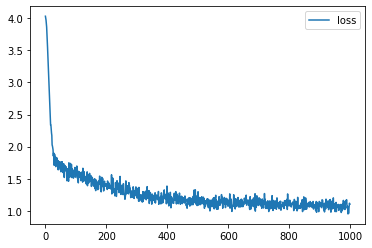

1.1016388


In [0]:
from IPython.display import clear_output
from random import sample

s.run(tf.global_variables_initializer())

batch_size = 32
history = []
final_loss = 0

for i in range(1000):
    batch = to_matrix(sample(names, batch_size), max_len=MAX_LENGTH)
    loss_i, _ = s.run([loss, optimize], {input_sequence: batch})
    final_loss = loss_i

    history.append(loss_i)
    
    if (i + 1) % 100 == 0:
        clear_output(True)
        plt.plot(history, label='loss')
        plt.legend()
        plt.show()
        
print(final_loss)
assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge"

# RNN: sampling
Once we've trained our network a bit, let's get to actually generating stuff. All we need is the `rnn_one_step` function you have written above.

In [0]:
x_t = tf.placeholder(tf.int32, (1,))
h_t = tf.Variable(np.zeros([1, rnn_num_units], np.float32))  # we will update hidden state in this variable

# For sampling we need to define `rnn_one_step` tensors only once in our graph.
# We reuse all parameters thanks to functional API usage.
# Then we can feed appropriate tensor values using feed_dict in a loop.
# Note how different it is from training stage, where we had to unroll the whole sequence for backprop.
next_probs, next_h = rnn_one_step(x_t, h_t)

In [0]:
def generate_sample(seed_phrase=start_token, max_length=MAX_LENGTH):
    '''
    This function generates text given a `seed_phrase` as a seed.
    Remember to include start_token in seed phrase!
    Parameter `max_length` is used to set the number of characters in prediction.
    '''
    x_sequence = [token_to_id[token] for token in seed_phrase]
    s.run(tf.assign(h_t, h_t.initial_value))
    
    # feed the seed phrase, if any
    for ix in x_sequence[:-1]:
         s.run(tf.assign(h_t, next_h), {x_t: [ix]})
    
    # start generating
    for _ in range(max_length-len(seed_phrase)):
        x_probs,_ = s.run([next_probs, tf.assign(h_t, next_h)], {x_t: [x_sequence[-1]]})
        x_sequence.append(np.random.choice(n_tokens, p=x_probs[0]))
        
    return ''.join([tokens[ix] for ix in x_sequence if tokens[ix] != pad_token])

In [0]:
# without prefix
for _ in range(10):
    print(generate_sample())

 Karlei
 Mir
 Jofhy
 Wabi
 Eos
 Gerry
 Rancet
 Odco
 Miceed
 Kardhens


In [0]:
# with prefix conditioning
for _ in range(10):
    print(generate_sample('Sam'))

SamheCxFFRDRDPDX
SamSunuSWHC'UXBW
SammC'cMikhin


KeyboardInterrupt: ignored

# Submit to Coursera

In [0]:
# token expires every 30 min
COURSERA_TOKEN = "#"
COURSERA_EMAIL = "#"

In [0]:
from submit import submit_char_rnn
samples = [generate_sample(' Al') for i in tqdm_utils.tqdm_notebook_failsafe(range(25))]
submission = (history, samples)
submit_char_rnn(submission, COURSERA_EMAIL, COURSERA_TOKEN)

*************************

Submitted to Coursera platform. See results on assignment page!


# Try it out!

__Disclaimer:__ This part of assignment is entirely optional. You won't receive bonus points for it. However, it's a fun thing to do. Please share your results on course forums.

You've just implemented a recurrent language model that can be tasked with generating any kind of sequence, so there's plenty of data you can try it on:

* Novels/poems/songs of your favorite author
* News titles/clickbait titles
* Source code of Linux or Tensorflow
* Molecules in [smiles](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) format
* Melody in notes/chords format
* IKEA catalog titles
* Pokemon names
* Cards from Magic, the Gathering / Hearthstone

If you're willing to give it a try, here's what you wanna look at:
* Current data format is a sequence of lines, so a novel can be formatted as a list of sentences. Alternatively, you can change data preprocessing altogether.
* While some datasets are readily available, others can only be scraped from the web. Try `Selenium` or `Scrapy` for that.
* Make sure MAX_LENGTH is adjusted for longer datasets. There's also a bonus section about dynamic RNNs at the bottom.
* More complex tasks require larger RNN architecture, try more neurons or several layers. It would also require more training iterations.
* Long-term dependencies in music, novels or molecules are better handled with LSTM or GRU

__Good hunting!__

# Bonus level: dynamic RNNs

Apart from Keras, there's also a friendly TensorFlow API for recurrent neural nets. It's based around the symbolic loop function (aka [tf.scan](https://www.tensorflow.org/api_docs/python/tf/scan)).

RNN loop that we implemented for training can be replaced with single TensorFlow instruction: [tf.nn.dynamic_rnn](https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn).
This interface allows for dynamic sequence length and comes with some pre-implemented architectures.

Take a look at [tf.nn.rnn_cell.BasicRNNCell](https://www.tensorflow.org/api_docs/python/tf/contrib/rnn/BasicRNNCell).

In [0]:
class CustomRNN(tf.nn.rnn_cell.BasicRNNCell):
    def call(self, input, state):
        # from docs:
        # Returns:
        # Output: A 2-D tensor with shape [batch_size, self.output_size].
        # New state: Either a single 2-D tensor, or a tuple of tensors matching the arity and shapes of state.
        return rnn_one_step(input[:, 0], state)
    
    @property
    def output_size(self):
        return n_tokens
    
cell = CustomRNN(rnn_num_units)

input_sequence = tf.placeholder(tf.int32, (None, None))
    
predicted_probas, last_state = tf.nn.dynamic_rnn(cell, input_sequence[:, :, None], dtype=tf.float32)

print('LSTM outputs for each step [batch,time,n_tokens]:')
print(predicted_probas.eval({input_sequence: to_matrix(names[:10], max_len=50)}).shape)

Note that we never used MAX_LENGTH in the code above: TF will iterate over however many time-steps you gave it.

You can also use any pre-implemented RNN cell:

In [0]:
for obj in dir(tf.nn.rnn_cell) + dir(tf.contrib.rnn):
    if obj.endswith('Cell'):
        print(obj, end="\t")

In [0]:
input_sequence = tf.placeholder(tf.int32, (None, None))

inputs_embedded = embed_x(input_sequence)

# standard cell returns hidden state as output!
cell = tf.nn.rnn_cell.LSTMCell(rnn_num_units)

state_sequence, last_state = tf.nn.dynamic_rnn(cell, inputs_embedded, dtype=tf.float32)

s.run(tf.global_variables_initializer())

print('LSTM hidden state for each step [batch,time,rnn_num_units]:')
print(state_sequence.eval({input_sequence: to_matrix(names[:10], max_len=50)}).shape)